In [0]:
import itertools
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import numpy as np
from timeit import default_timer as timer
def overlap(a, b, min_length=3):
    start = 0
    while True:
      start = a.find(b[:min_length], start)
      if start == -1:
          return 0
      if b.startswith(a[start:]):
          return len(a)-start
      start += 1



In [0]:
import random
import copy
strings = []
chars = ['A','B','C']
for i in range(0,19):
  string2 =''
  for i in range(0,3):
    string2 += random.choice(chars)  
  strings.append(string2)
print(strings)

['ABC', 'BBC', 'ACB', 'CAB', 'CAB', 'ACA', 'ACA', 'BCA', 'BBA', 'ABA', 'AAB', 'CCC', 'BCC', 'BCC', 'CAB', 'BAA', 'CCB', 'ACA', 'ACB']


In [0]:

def pick_maximal_overlap(reads, k):
  reada , readb = None , None
  best_olen = 0
  for a,b in itertools.permutations(reads,2):
    olen = overlap(a,b,min_length= k)
    if olen > best_olen:
      reada ,readb = a ,b
      best_olen = olen
  return reada, readb , best_olen

In [0]:
def greedy_scs(reads ,k):
  read_a, read_b, olen = pick_maximal_overlap(reads,k)
  while olen >0:
    reads.remove(read_a)
    reads.remove(read_b)
    reads.append(read_a + read_b[olen:])
    read_a , read_b , olen = pick_maximal_overlap(reads, k)
  return ''.join(reads)

In [0]:
# realone dynamic
from functools import lru_cache
from typing import *

class Solution:
    def shortestSuperstring(self, strings: List[str]) -> str:
        """
        Dynamic programming
        
        Reduce the problem of find the best concatenation for [1, 2, 3] to:
        - Choose 1 and recurse on [2, 3], and put 1 at the start or at the end of this sub-solution
        - Choose 2 and recurse on [1, 3], and put 2 at the start or at the end of this sub-solution
        - Etc
        """
        
        def concat(s1, s2):
            l = min(len(s1), len(s2))
            for i in reversed(range(1, l+1)):
                if s1.endswith(s2[:i]):
                    return s1 + s2[i:]
            return s1 + s2
        
        @lru_cache(maxsize=None)
        def visit(visited):     
            best_score = float('inf')
            best_suffix = ""
            
            for i, s in enumerate(strings):
                if not (1 << i) & visited:    
                    sub_suffix = visit((1 << i) | visited)
                    
                    suffix = concat(s, sub_suffix)
                    if len(suffix) < best_score:
                        best_score = len(suffix)
                        best_suffix = suffix
                    
                    suffix = concat(sub_suffix, s)
                    if len(suffix) < best_score:
                        best_score = len(suffix)
                        best_suffix = suffix
            
            return best_suffix
            
        best_solution = visit(0)
        return best_solution

In [0]:
greedy_scs(['ABC', 'BCA', 'CAB','BAC', 'ACC', 'CCA', 'ACA'] , 1)

'BACCABCACA'

In [0]:
def errorcounts_test(string_count):
  listofreal_lenght = []
  listofgreedy_lenght = []
  for u in range(0,50): # test count = 50
    strings = []
    chars = ['A','B','C']
    for i in range(0,string_count):
      string2 =''
      for i in range(0,3):
        string2 += random.choice(chars)  #random 3 char from our list
      strings.append(string2)
    testreal2 = copy.deepcopy(strings)
    x = Solution()
    a = x.shortestSuperstring(testreal2)  # Dynamic Programming Algorith 
    listofreal_lenght.append(len(a))
    testgreedy2 = copy.deepcopy(strings) # Greedy Algorith
    b = greedy_scs(testgreedy2,1)
    listofgreedy_lenght.append(len(b))
    
  #print(listofreal_lenght)
  #print(listofgreedy_lenght)
  return( np.array(listofgreedy_lenght)-np.array(listofreal_lenght)) # return index dif. as a list





In [0]:
def runningtime_test(string_count):
  
  strings = []
  chars = ['A','B','C']
  for i in range(0,string_count):
    string2 =''
    for i in range(0,3):
      string2 += random.choice(chars)  #random 3 char from our list
    strings.append(string2)
  testreal2 = copy.deepcopy(strings)
  x = Solution()
  realtimer_start = timer()
  a = x.shortestSuperstring(testreal2)  # Dynamic Programming Algorith  
  realtimer_end = timer()
  testgreedy2 = copy.deepcopy(strings) # Greedy Algorith
  greedytimer_start = timer()
  b = greedy_scs(testgreedy2,1)
  greedytimer_end = timer()
  return (realtimer_end - realtimer_start) , (greedytimer_end - greedytimer_start)

In [0]:
def runningtime_difstr_size(str_size):
  strings = []
  chars = ['A','B','C']
  for i in range(0,10):
    string2 =''
    for i in range(0,str_size+1):
      string2 += random.choice(chars)  #random 3 char from our list
    strings.append(string2)
  testreal2 = copy.deepcopy(strings)
  x = Solution()
  realtimer_start = timer()
  a = x.shortestSuperstring(testreal2)  # Dynamic Programming Algorith  
  realtimer_end = timer()
  testgreedy2 = copy.deepcopy(strings) # Greedy Algorith
  greedytimer_start = timer()
  b = greedy_scs(testgreedy2,1)
  greedytimer_end = timer()
  return (realtimer_end - realtimer_start) , (greedytimer_end - greedytimer_start)

In [0]:
timeofreal_size = []
timeofgreedy_size = []
for i in range(1,21):
  a = runningtime_difstr_size(i)
  timeofreal_size.append(a[0])
  timeofgreedy_size.append(a[1])

print(timeofreal_size)
print(timeofgreedy_size)

[0.018686852999991288, 0.019194169000002148, 0.02144073399998092, 0.0239742389999833, 0.025987564000018892, 0.026373497000008683, 0.028710742000015443, 0.02993539599998485, 0.030978267000023152, 0.0343485519999831, 0.03668575699998655, 0.03672057599999334, 0.03993560000000684, 0.03959938400001306, 0.04274900500001877, 0.0468258920000153, 0.045350982000002205, 0.04812538499999164, 0.05001223200000027, 0.05431940899998722]
[0.0002168780000033621, 0.0002663500000039676, 0.0003217169999913949, 0.0003908799999976509, 0.00037438100000031227, 0.0005205060000150752, 0.0005350170000042453, 0.0005978439999978491, 0.0006268890000171723, 0.0007335260000047583, 0.0008201679999899625, 0.0008095249999939824, 0.0009907840000096257, 0.0009916730000156804, 0.0012872819999927287, 0.0009843470000134857, 0.0010458200000016404, 0.0012209350000205177, 0.0014289110000049732, 0.0013395860000002813]


In [0]:
numberof_str3 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]      # yarın mean al bunları
plt.figure(figsize=(15,8)  )
plt.plot(numberof_str2,timeofreal_size , label = 'Running Time of SCS DP Algorithm ' , marker = "*" )
#plt.plot(numberof_str2,timeofgreedy_size , label = "Running Time of SCS Greedy Algorithm", marker = "*" )
plt.xticks(np.arange(1,26,1))
plt.xlabel("Size of String")
plt.ylabel("Time")
plt.title("Running Time Graph /w Different String Sizes, Fixed String Count")
plt.legend()

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [0]:
timeofreal = []
timeofgreedy = []
for i in range(1,21):
  a = runningtime_test(i)
  timeofreal.append(a[0])
  timeofgreedy.append(a[1])
  

KeyboardInterrupt: ignored

In [0]:
print(timeofreal)
print(timeofgreedy)

[4.507799894781783e-05, 4.387599983601831e-05, 9.372600106871687e-05, 0.0002179830007662531, 0.0005126100004417822, 0.0008161149999068584, 0.0029568360005214345, 0.0047102409989747684, 0.008318821997818304, 0.017649389999860432, 0.04041192400109139, 0.08294025100258295, 0.18665037100072368, 0.41057811900100205, 0.8633681969986355, 1.8898550419980893, 3.9860542599999462, 8.484485114000563, 17.988051096999698, 38.335478186996625]
[2.9688999347854406e-05, 1.4708002709085122e-05, 2.300999767612666e-05, 4.061100116814487e-05, 6.383399886544794e-05, 7.23550001566764e-05, 0.00010133300020243041, 0.00014373800149769522, 0.00020072099869139493, 0.00026115500077139586, 0.0003533400013111532, 0.00043077400187030435, 0.0005617020033241715, 0.0006575330007763114, 0.0008036830004130024, 0.0009362060009152628, 0.001167803999123862, 0.0013460099980875384, 0.0015836700004001614, 0.0019240450019424316]


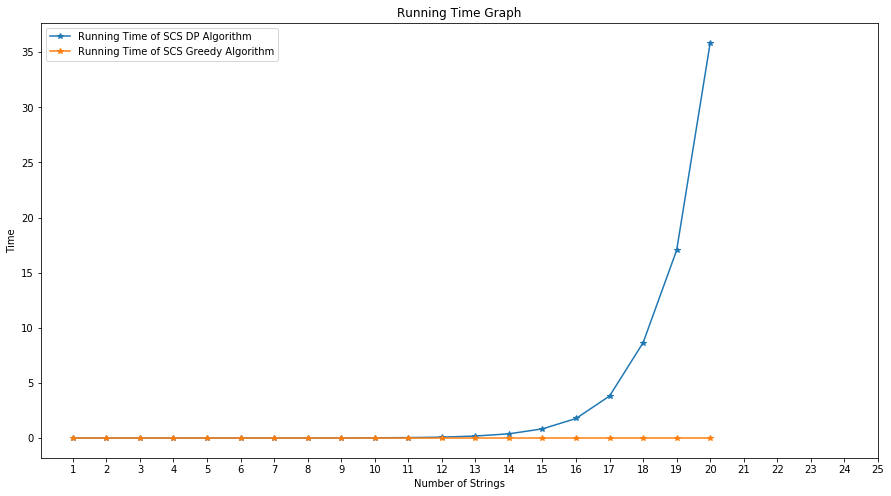

In [0]:
numberof_str2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(15,8)  )
plt.plot(numberof_str2,timeofreal , label = 'Running Time of SCS DP Algorithm' , marker = "*" )
plt.plot(numberof_str2,timeofgreedy , label = "Running Time of SCS Greedy Algorithm", marker = "*" )
plt.xticks(np.arange(1,26,1))
plt.xlabel("Number of Strings")
plt.ylabel("Time")
plt.title("Running Time Graph")
plt.legend()

In [0]:
timeofreal_sum = []
timeofgreedy_sum = []
for x in range (0,3):
  for i in range(1,21):
    a = runningtime_test(i)
    timeofreal_sum.append(a[0])
    timeofgreedy_sum.append(a[1])
  timeofreal_sum.append(',')
  timeofgreedy_sum.append(',')

print(timeofreal_sum)
print(timeofgreedy_sum)

[3.424199985602172e-05, 2.7381000109016895e-05, 4.9778000175138004e-05, 0.00013390399999479996, 0.0003747869996004738, 0.0007069489997775236, 0.0018930800001726311, 0.004796437000095466, 0.008003980000012234, 0.017863977999695635, 0.040256551999846124, 0.08210180100013531, 0.1815784209998128, 0.3963472760001423, 0.8530331580000166, 1.7938051140004063, 3.8673293890001332, 8.372365766999792, 17.773919401999592, 37.095195046999834, ',', 3.6061000173504e-05, 2.3815000076865545e-05, 8.264100006272201e-05, 0.00011540399964360404, 0.000282051999874966, 0.0006558030004271131, 0.0015305560000342666, 0.003444904000389215, 0.0078073530003166525, 0.017077456999686547, 0.03726039499997569, 0.0831346219997613, 0.18047164100016744, 0.3901740789997348, 0.8321137859998089, 1.8005826370003888, 3.864089796999906, 8.209686867000073, 17.37835377600004, 37.332905084999766, ',', 3.168500006722752e-05, 2.0730999949591933e-05, 4.5619000047736336e-05, 0.00011436199974923511, 0.00029860899985578726, 0.0006603820

20
20
20


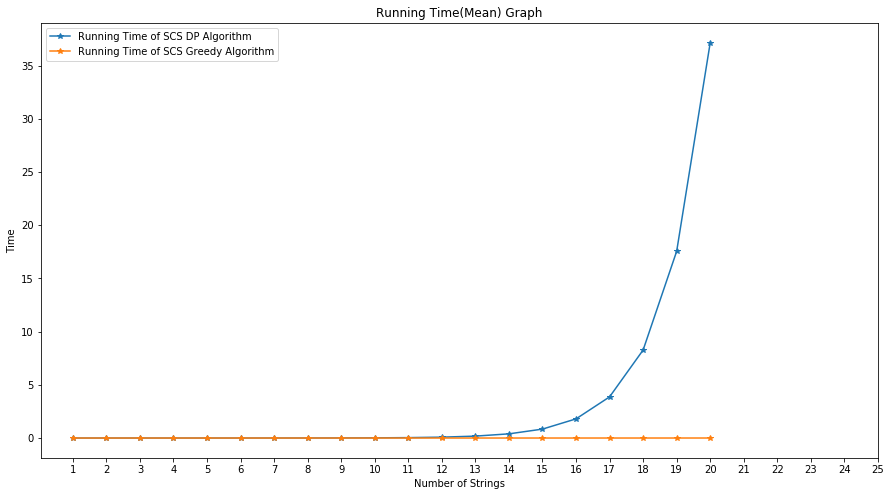

In [0]:

timeofgreedy_sum_1 = timeofgreedy_sum[0:20]
timeofgreedy_sum_2 = timeofgreedy_sum[21:41]
timeofgreedy_sum_3 = timeofgreedy_sum[42:62]
print(len(timeofgreedy_sum_1))
print(len(timeofgreedy_sum_2))
print(len(timeofgreedy_sum_3))
timeofgreedy_sum_sum = list(np.array(timeofgreedy_sum_1)+np.array(timeofgreedy_sum_2)+np.array(timeofgreedy_sum_3))
timeofgreedy_sum_sum = list(np.array(timeofgreedy_sum_sum) / 3)


timeofreal_sum_1 = timeofreal_sum[0:20]
timeofreal_sum_2 = timeofreal_sum[21:41]
timeofreal_sum_3 = timeofreal_sum[42:62]
timeofreal_sum_sum = list(np.array(timeofreal_sum_1)+np.array(timeofreal_sum_2)+np.array(timeofreal_sum_3))
timeofreal_sum_sum = list(np.array(timeofreal_sum_sum) / 3)

numberof_str2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(15,8)  )
plt.plot(numberof_str2,timeofreal_sum_sum , label = 'Running Time of SCS DP Algorithm' , marker = "*" )
plt.plot(numberof_str2,timeofgreedy_sum_sum , label = "Running Time of SCS Greedy Algorithm", marker = "*" )
plt.xticks(np.arange(1,26,1))
plt.xlabel("Number of Strings")
plt.ylabel("Time")
plt.title("Running Time(Mean) Graph")
plt.legend()


In [0]:
fig = go.Figure(data=[go.Table(header=dict(values=['String Count', 'Mean Running Time of Greedy Alg.' ,'Mean Running Time of DP Alg.' ]),
                 cells=dict(values=[numberof_str2, timeofgreedy_sum_sum, timeofreal_sum_sum]))
                     ])
fig.update_layout(width=1000, height=3000)
fig.show()

In [0]:
#mean of error 
for z in range(5):
  a = errorcounts_test(13)
  count = 0
  for x in a:
    if x != 0:
      count = count + 1
  print(a)
  print(count)

[0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 2
 1 0 2 0 0 0 0 0 0 0 0 1 1]
13
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 0 1 1 0 1 0 0 1 1 0 0 0 3 0 0 0 0
 0 1 0 2 0 0 2 0 1 0 0 0 0]
13
[ 0  0  0  0  1  0  0  0  0  0  1  0  0  1  0  1  0  3  2  2  1  2  0  0
  2  0  0  0  0  0  0  0  0  0  1  0  1  0  0  2  2  0  1  1 -1  0  0  0
  0  1]
18
[0 0 0 0 0 1 1 0 0 0 2 1 0 0 0 0 0 0 0 3 0 0 0 1 0 1 2 0 1 0 1 1 0 0 2 0 2
 0 0 0 0 0 0 0 0 1 1 2 0 0]
16
[ 1  1  0  1  2  1  0  0  0  1  1  0  0 -1  1  3  1  0  1  1  0  0  0  0
  0  0  0  1  0  0  1  0  0  1  1  1  1  1  0  0  0  3  0  0  0  1  0  1
  0  0]
23


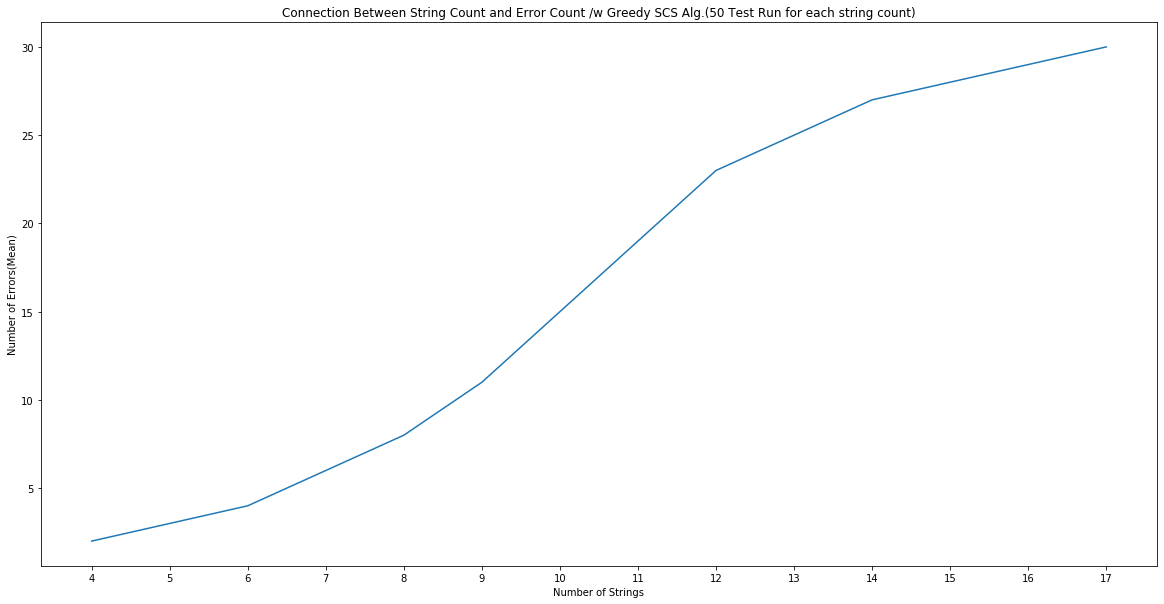

In [0]:
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals



numberof_str = [4,5,6,7,8,9,10,11,12,13,14,15,16,17]
numberof_err = [2,3,4,6,8,11,15,19,23,25,27,28,29,30]
plt.figure(figsize=(20,10) , )
plt.plot(numberof_str,numberof_err )
plt.xticks(np.arange(4,18,1))
plt.xlabel("Number of Strings")
plt.ylabel("Number of Errors(Mean)")
plt.title("Connection Between String Count and Error Count /w Greedy SCS Alg.(50 Test Run for each string count)")
successrate_str =list((50- np.array(numberof_err))/50)

plt.show()

In [0]:
print(successrate_str)

[0.96, 0.94, 0.92, 0.88, 0.84, 0.78, 0.7, 0.62, 0.54, 0.5, 0.46, 0.44, 0.42, 0.4]


In [0]:
fig = go.Figure(data=[go.Table(header=dict(values=['String Count', 'Mean Succes Rate of Greedy Alg.']),
                 cells=dict(values=[numberof_str, successrate_str]))
                     ])

fig.show()

Text(0.5, 1.0, 'Success Rate Graph of Greedy Alg. According to String Count')

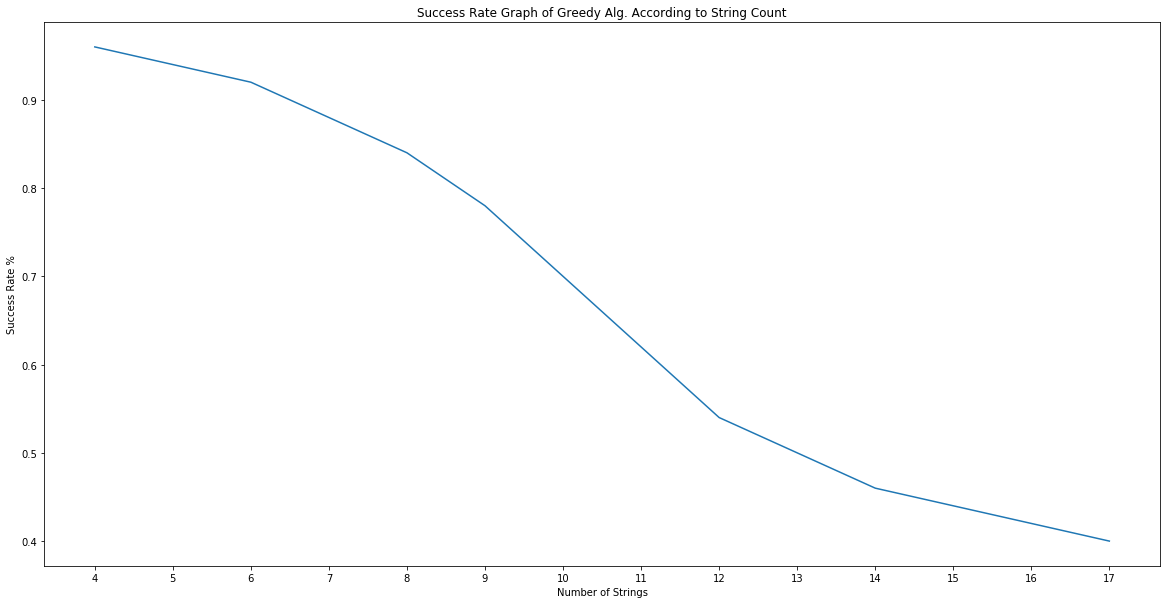

In [0]:
plt.figure(figsize=(20,10) , )
plt.plot(numberof_str,successrate_str )
plt.xticks(np.arange(4,18,1))
plt.xlabel("Number of Strings")
plt.ylabel("Success Rate %")
plt.title("Success Rate Graph of Greedy Alg. According to String Count")

In [0]:
start = timer()
testgreedy1 = copy.deepcopy(strings)
print(len(greedy_scs(testgreedy1 , 1)))
end = timer()
print(end - start)

19
0.003023252999810211


In [0]:
testreal = copy.deepcopy(strings)
scs(testreal)

'CAACCCABABCBBABBCACABCACABAAACABAABBACCABBACAACBAACAB'

In [0]:
def runningtime_test_alp():
  
  strings = []
  chars = ['A','B','C']
  for i in range(0,10):
    string2 =''
    for i in range(0,3):
      string2 += random.choice(chars)  #random 3 char from our list
    strings.append(string2)
  testreal2 = copy.deepcopy(strings)
  x = Solution()
  realtimer_start = timer()
  a = x.shortestSuperstring(testreal2)  # Dynamic Programming Algorith  
  realtimer_end = timer()
  testgreedy2 = copy.deepcopy(strings) # Greedy Algorith
  greedytimer_start = timer()
  b = greedy_scs(testgreedy2,1)
  greedytimer_end = timer()
  return (realtimer_end - realtimer_start) , (greedytimer_end - greedytimer_start)

In [0]:
timeofreal_sum_alp = [] #list icindekiler topla 20 ye böl bunu alp size 3,4,5,6,7 için yap
timeofgreedy_sum_alp = []
for x in range (0,1):
  for i in range(1,21):
    a = runningtime_test_alp()
    timeofreal_sum_alp.append(a[0])
    timeofgreedy_sum_alp.append(a[1])
  
meanofreal_alph = sum(timeofreal_sum_alp) / 20
meanofgreedy_alph = sum(timeofgreedy_sum_alp) /20
print(meanofreal_alph)
print(meanofgreedy_alph)

0.019590606299971114
0.00027133580001645894


In [0]:
sumofrealalph_list = []
sumofgreedyalph_list = []

In [0]:
sumofrealalph_list.append(meanofreal_alph)
sumofgreedyalph_list.append(meanofgreedy_alph)
print(sumofgreedyalph_list)
print(sumofrealalph_list)

[0.00026608699999997043, 0.0002500405500029501, 0.00022672000000625303, 0.000215614850003476, 0.00019942329999480534]
[0.019701402649997136, 0.01955466159999446, 0.019405229099999134, 0.01956102695002073, 0.01943688284999894]


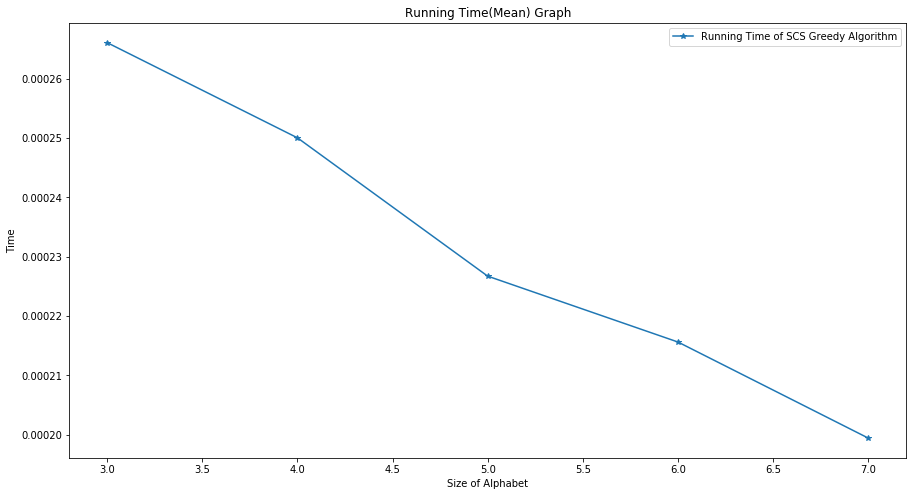

In [0]:
numberof_str2 = [3,4,5,6,7]
plt.figure(figsize=(15,8)  )
#plt.plot(numberof_str2,sumofrealalph_list , label = 'Running Time of SCS DP Algorithm' , marker = "*" )
plt.plot(numberof_str2,sumofgreedyalph_list , label = "Running Time of SCS Greedy Algorithm", marker = "*" )
plt.xlabel("Size of Alphabet")
plt.ylabel("Time")
plt.title("Running Time(Mean) Graph According to Size of Alphabet")
plt.legend()

In [0]:
fig = go.Figure(data=[go.Table(header=dict(values=['Alphabet Size', 'Running Time(mean)']),
                 cells=dict(values=[numberof_str2, sumofgreedyalph_list]))
                     ])

fig.show()

20
20
20


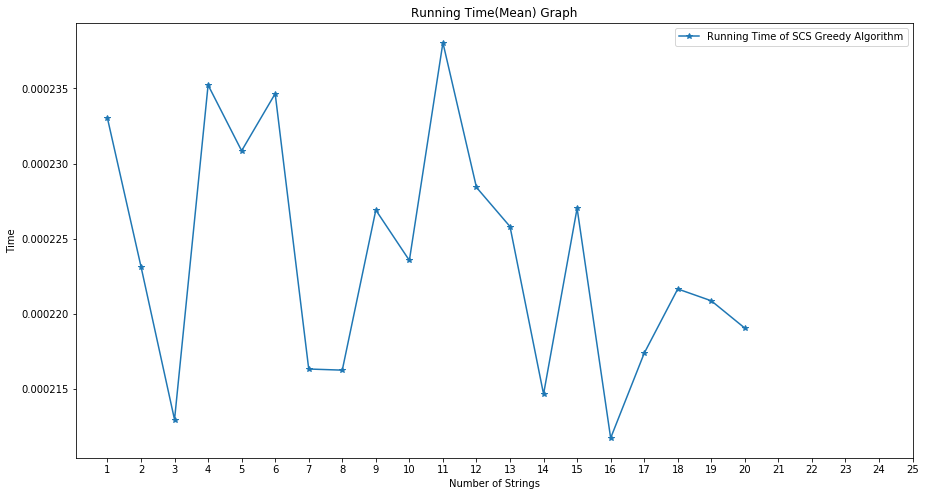

In [0]:
timeofgreedy_sum_1_alp = timeofgreedy_sum_alp[0:20]
timeofgreedy_sum_2_alp = timeofgreedy_sum_alp[21:41]
timeofgreedy_sum_3_alp = timeofgreedy_sum_alp[42:62]
print(len(timeofgreedy_sum_1_alp))
print(len(timeofgreedy_sum_2_alp))
print(len(timeofgreedy_sum_3_alp))
timeofgreedy_sum_sum_alp = list(np.array(timeofgreedy_sum_1_alp)+np.array(timeofgreedy_sum_2_alp)+np.array(timeofgreedy_sum_3_alp))
timeofgreedy_sum_sum_alp = list(np.array(timeofgreedy_sum_sum_alp) / 3)


timeofreal_sum_1_alp = timeofreal_sum_alp[0:20]
timeofreal_sum_2_alp = timeofreal_sum_alp[21:41]
timeofreal_sum_3_alp = timeofreal_sum_alp[42:62]
timeofreal_sum_sum_alp = list(np.array(timeofreal_sum_1_alp)+np.array(timeofreal_sum_2_alp)+np.array(timeofreal_sum_3_alp))
timeofreal_sum_sum_alp = list(np.array(timeofreal_sum_sum_alp) / 3)

numberof_str2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(15,8)  )
#plt.plot(numberof_str2,timeofreal_sum_sum_alp , label = 'Running Time of SCS DP Algorithm' , marker = "*" )
plt.plot(numberof_str2,timeofgreedy_sum_sum_alp , label = "Running Time of SCS Greedy Algorithm", marker = "*" )
plt.xticks(np.arange(1,26,1))
plt.xlabel("Number of Strings")
plt.ylabel("Time")
plt.title("Running Time(Mean) Graph")
plt.legend()